# Clustering

In [8]:
#importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [9]:
#importar dados principais
df = pd.read_csv('../downloads/data.csv')

In [10]:
df.head()

,Unnamed: 0,index,Unnamed: 0.1,morador,numero_controle,bloco,bloco_classificacao,dt_visita,dt_termino,tempo_total_entrev,...,escolaridade,estado_civil,faixa_renda,int_renda,nivel_gastos,categoria_escolaridade,categoria_transporte,categoria_hospedagem,categoria_regiao,faixa_etaria
0,0,0,0,Morador,1,Tchanzinho Zona Norte,Outros,2018-02-09 17:39:00,2018-02-09 17:47:00,0 days 00:08:27,...,Ensino superior completo,Solteiro (a),"De 2 a 4 salários (R$ 1.875,00 - R$ 3.816,00)",3,Baixo,Graduado,NaN,Outros,Sudeste,Adulto
1,1,1,1,Morador,2,Tchanzinho Zona Norte,Outros,2018-02-09 17:39:00,2018-02-09 17:51:00,0 days 00:11:21,...,Pos – Graduaçao – Mestrado,Solteiro (a),"De 4 a 8 salários (R$ 3.749,00 - R$ 7.632,00)",5,Baixo,Pós,NaN,Outros,Sudeste,Adulto
2,2,2,2,Morador,3,Tchanzinho Zona Norte,Outros,2018-02-09 17:40:00,2018-02-09 17:52:00,0 days 00:11:43,...,Ensino superior incompleto,Solteiro (a),"De 4 a 8 salários (R$ 3.749,00 - R$ 7.632,00)",6,Baixo,Graduado,NaN,Outros,Sudeste,Jovem adulto
3,3,3,3,Morador,4,Tchanzinho Zona Norte,Outros,2018-02-09 17:43:00,2018-02-09 17:55:00,0 days 00:12:39,...,Ensino superior completo,Casado (a),"De 4 a 8 salários (R$ 3.749,00 - R$ 7.632,00)",7,Baixo,Graduado,NaN,Outros,Sudeste,Meia-idade
4,4,4,4,Morador,5,Tchanzinho Zona Norte,Outros,2018-02-09 17:49:00,2018-02-09 17:58:00,0 days 00:08:49,...,Ensino medio completo,Solteiro (a),"De 4 a 8 salários (R$ 3.749,00 - R$ 7.632,00)",6,Baixo,Ensino Básico,NaN,Outros,Sudeste,Meia-idade


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 66 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1581 non-null   int64  
 1   index                       1581 non-null   int64  
 2   Unnamed: 0.1                1581 non-null   int64  
 3   morador                     1581 non-null   object 
 4   numero_controle             1581 non-null   int64  
 5   bloco                       1581 non-null   object 
 6   bloco_classificacao         1581 non-null   object 
 7   dt_visita                   1581 non-null   object 
 8   dt_termino                  1581 non-null   object 
 9   tempo_total_entrev          1581 non-null   object 
 10  idade                       1581 non-null   int64  
 11  pais                        1581 non-null   object 
 12  estado                      1581 non-null   object 
 13  cidade                      1581 

In [12]:
#retirar colunas que nao incluem informação a priori do visitante (incluindo o que ele fez na cidade)
#np.r_ concatena as slices
df = df.iloc[:,np.r_[3,10:14,34,55:60]]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   morador                     1581 non-null   object
 1   idade                       1581 non-null   int64 
 2   pais                        1581 non-null   object
 3   estado                      1581 non-null   object
 4   cidade                      1581 non-null   object
 5   participou_anos_anteriores  1581 non-null   object
 6   genero                      1581 non-null   object
 7   escolaridade                1581 non-null   object
 8   estado_civil                1581 non-null   object
 9   faixa_renda                 1581 non-null   object
 10  int_renda                   1581 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 136.0+ KB


Df bem mais simples, só com dados prévios, sem entradas nulas. 

In [14]:
#ver aspecto
df.head()

,morador,idade,pais,estado,cidade,participou_anos_anteriores,genero,escolaridade,estado_civil,faixa_renda,int_renda
0,Morador,25,Brasil,Minas Gerais,Vespasiano,Sim,Feminino,Ensino superior completo,Solteiro (a),"De 2 a 4 salários (R$ 1.875,00 - R$ 3.816,00)",3
1,Morador,32,Brasil,Minas Gerais,Belo Horizonte,Sim,Feminino,Pos – Graduaçao – Mestrado,Solteiro (a),"De 4 a 8 salários (R$ 3.749,00 - R$ 7.632,00)",5
2,Morador,18,Brasil,Minas Gerais,Belo Horizonte,Sim,Feminino,Ensino superior incompleto,Solteiro (a),"De 4 a 8 salários (R$ 3.749,00 - R$ 7.632,00)",6
3,Morador,40,Brasil,Minas Gerais,Belo Horizonte,Nao,Feminino,Ensino superior completo,Casado (a),"De 4 a 8 salários (R$ 3.749,00 - R$ 7.632,00)",7
4,Morador,47,Brasil,Minas Gerais,Belo Horizonte,Sim,Masculino,Ensino medio completo,Solteiro (a),"De 4 a 8 salários (R$ 3.749,00 - R$ 7.632,00)",6


In [15]:
#int_renda é o mesmo que faixa_renda
df = df.drop(['faixa_renda'], axis=1)

In [16]:
#combinar colunas pais, estado e cidade para 'origem' - menos colunas melhor com menos variaveis para OHE, melhor
df['origem'] = 'vazio'
for i in range(len(df)):
    if df.loc[i,'pais'] != 'Brasil':
        df.loc[i,'origem'] = 'estrangeiro'
    elif df.loc[i,'estado'] != 'Minas Gerais':
        df.loc[i,'origem'] = 'brasileiro'
    elif df.loc[i,'cidade'] != 'Belo Horizonte':
        df.loc[i,'origem'] = 'mineiro'
    else:
        df.loc[i,'origem'] = 'belo-horizontino'
df.head(15)

,morador,idade,pais,estado,cidade,participou_anos_anteriores,genero,escolaridade,estado_civil,int_renda,origem
0,Morador,25,Brasil,Minas Gerais,Vespasiano,Sim,Feminino,Ensino superior completo,Solteiro (a),3,mineiro
1,Morador,32,Brasil,Minas Gerais,Belo Horizonte,Sim,Feminino,Pos – Graduaçao – Mestrado,Solteiro (a),5,belo-horizontino
2,Morador,18,Brasil,Minas Gerais,Belo Horizonte,Sim,Feminino,Ensino superior incompleto,Solteiro (a),6,belo-horizontino
3,Morador,40,Brasil,Minas Gerais,Belo Horizonte,Nao,Feminino,Ensino superior completo,Casado (a),7,belo-horizontino
4,Morador,47,Brasil,Minas Gerais,Belo Horizonte,Sim,Masculino,Ensino medio completo,Solteiro (a),6,belo-horizontino
5,Morador,23,Brasil,Minas Gerais,Belo Horizonte,Sim,Masculino,Ensino superior incompleto,Solteiro (a),11,belo-horizontino
6,Morador,16,Brasil,Minas Gerais,Belo Horizonte,Sim,Feminino,Ensino fundamental incompleto,Solteiro (a),2,belo-horizontino
7,Morador,58,Brasil,Minas Gerais,Belo Horizonte,Sim,Masculino,Ensino medio completo,Casado (a),3,belo-horizontino
8,Morador,65,Brasil,Minas Gerais,Belo Horizonte,Sim,Masculino,Ensino superior completo,Solteiro (a),4,belo-horizontino
9,Morador,25,Brasil,Minas Gerais,Belo Horizonte,Sim,Feminino,Pos – Graduaçao – Mestrado,Outro,5,belo-horizontino


Agora morador	pais	estado	cidade  tornaram-se redundantes.

In [17]:
#apagar colunas redundantes
df = df.drop(['morador','pais','estado','cidade'], axis=1)

In [18]:
df.head()

,idade,participou_anos_anteriores,genero,escolaridade,estado_civil,int_renda,origem
0,25,Sim,Feminino,Ensino superior completo,Solteiro (a),3,mineiro
1,32,Sim,Feminino,Pos – Graduaçao – Mestrado,Solteiro (a),5,belo-horizontino
2,18,Sim,Feminino,Ensino superior incompleto,Solteiro (a),6,belo-horizontino
3,40,Nao,Feminino,Ensino superior completo,Casado (a),7,belo-horizontino
4,47,Sim,Masculino,Ensino medio completo,Solteiro (a),6,belo-horizontino


In [19]:
#OHE para categoricas
df_transformed = pd.get_dummies(df)

In [20]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   idade                                          1581 non-null   int64
 1   int_renda                                      1581 non-null   int64
 2   participou_anos_anteriores_Nao                 1581 non-null   uint8
 3   participou_anos_anteriores_Sim                 1581 non-null   uint8
 4   genero_Feminino                                1581 non-null   uint8
 5   genero_Masculino                               1581 non-null   uint8
 6   escolaridade_Ensino fundamental completo       1581 non-null   uint8
 7   escolaridade_Ensino fundamental incompleto     1581 non-null   uint8
 8   escolaridade_Ensino medio completo             1581 non-null   uint8
 9   escolaridade_Ensino medio incompleto           1581 non-null   uint8
 10  

df pronto, sem valores nulos

In [21]:
#escalonar dados numéricos
scaler = StandardScaler()
X = scaler.fit_transform(df_transformed)

In [22]:
#determinar numero de clusters otimo
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}
#soma dos square means para cada cluster
sse = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

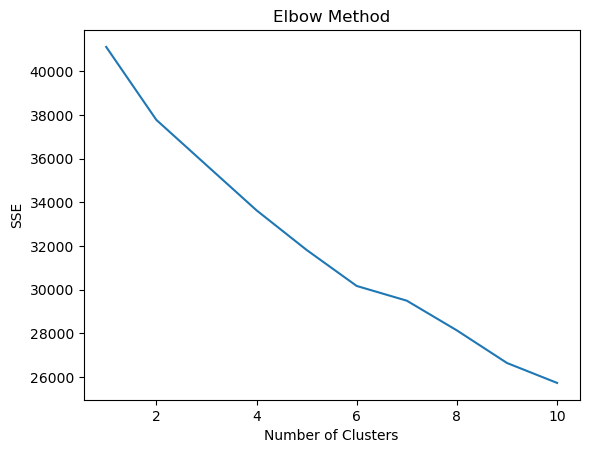

In [23]:
#vizualizar SSE para cada numero de clusters
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

Esperaria ver um cotovelo na curva. (poucos dados introduzidos no modelo?)

Vamos de 5 grupos que traz um equilibrio entre o SSE e o número de grupos.

In [24]:
#fazer clusterização pelo método mais comum de kmeans
kmeans = KMeans(n_clusters=5, **kmeans_kwargs)
kmeans.fit(X)

KMeans(init='random', n_clusters=5, random_state=42)

In [25]:
#atribuir cada entrada ao seu cluster 
df["cluster"] = kmeans.labels_
df_transformed["cluster"] = kmeans.labels_

In [26]:
# reduzir a dimensionalidade dos dados a 2 por principal component analysis, para se visualizar no gráfico cartesiano
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

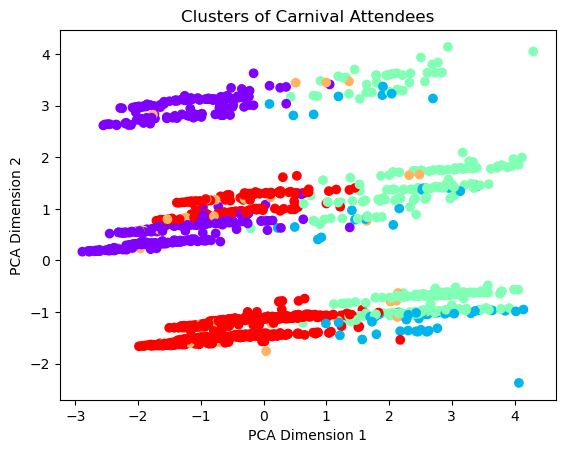

In [27]:
#plotar clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.title("Clusters of Carnival Attendees")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.show()

## Em construção:

**Nuno**:

Agora falta conseguir descrever as características de cada cluster.

Até agora temos o df original mais talhado.

e o df_transformed que já sofreu OHE e scaling.3

Agora acho melhor fazer agrupamentos pela coluna 'cluster' e ver o que emerge. Por exemplo, abaixo vejo que o cluster é um grupo bem mais jovem, de rendimentos médio-baixos. Enquanto o cluster 1 são pessoas de meia idade de classe média bem estabelecida.

Acho que dá para ir explorando nesta onda para criar os 5 perfis mais típicos.

Vou explorar a ideia de usar regressão linear para estimar quais as colunas têm maior preponderância para a divisão em clusters.

In [28]:
df

,idade,participou_anos_anteriores,genero,escolaridade,estado_civil,int_renda,origem,cluster
0,25,Sim,Feminino,Ensino superior completo,Solteiro (a),3,mineiro,0
1,32,Sim,Feminino,Pos – Graduaçao – Mestrado,Solteiro (a),5,belo-horizontino,4
2,18,Sim,Feminino,Ensino superior incompleto,Solteiro (a),6,belo-horizontino,4
3,40,Nao,Feminino,Ensino superior completo,Casado (a),7,belo-horizontino,2
4,47,Sim,Masculino,Ensino medio completo,Solteiro (a),6,belo-horizontino,4
...,...,...,...,...,...,...,...,...
1576,18,Sim,Feminino,Ensino tecnico,Solteiro (a),2,belo-horizontino,4
1577,31,Sim,Masculino,Ensino superior completo,Solteiro (a),3,belo-horizontino,4
1578,30,Nao,Feminino,Ensino medio completo,Casado (a),2,mineiro,2
1579,47,Sim,Masculino,Pos – Graduaçao – Especializaçao,Solteiro (a),11,belo-horizontino,4


In [29]:
# Group by cluster and compute median and count for all columns
summary = df.groupby('cluster').agg(['median', 'count'])
summary

idade       int_renda      
        median count    median count
cluster                             
0         24.0   375         4   375
1         41.5    72         4    72
2         40.0   311         5   311
3         19.0    74         3    74
4         26.0   749         4   749

In [30]:
df.groupby('cluster').agg(['median', 'count'])

idade       int_renda      
        median count    median count
cluster                             
0         24.0   375         4   375
1         41.5    72         4    72
2         40.0   311         5   311
3         19.0    74         3    74
4         26.0   749         4   749

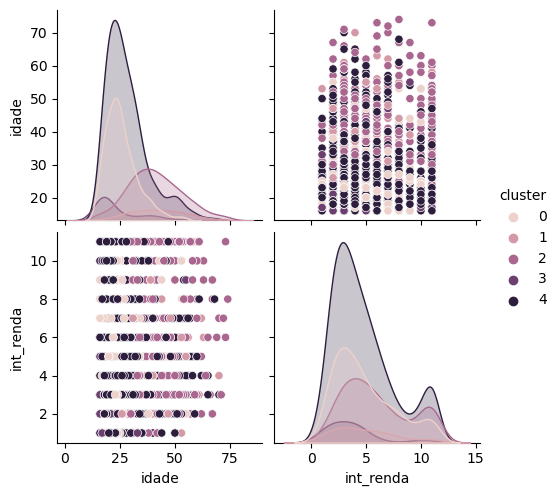

In [31]:

sns.pairplot(df, hue="cluster")

In [34]:
df.groupby(['cluster', 'genero']).agg({'idade':'count'})

idade
cluster genero          
0       Feminino     207
        Masculino    168
1       Feminino      53
        Masculino     19
2       Feminino     178
        Masculino    133
3       Feminino      41
        Masculino     33
4       Feminino     396
        Masculino    353

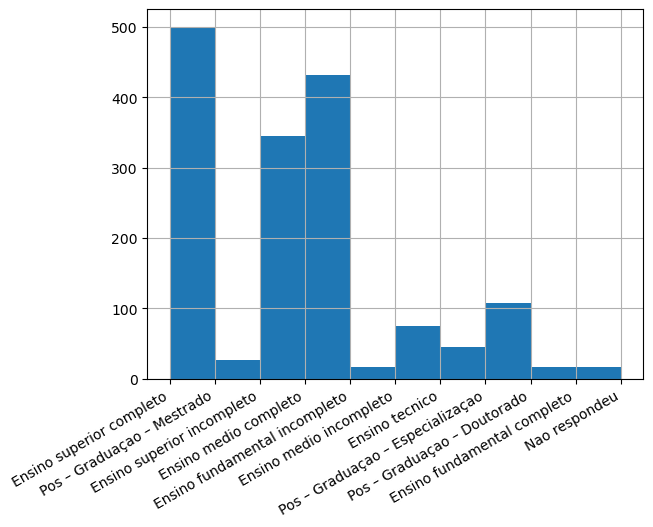

In [44]:
df['escolaridade'].hist(bins=10)
plt.xticks(rotation=30, ha='right')
plt.show()

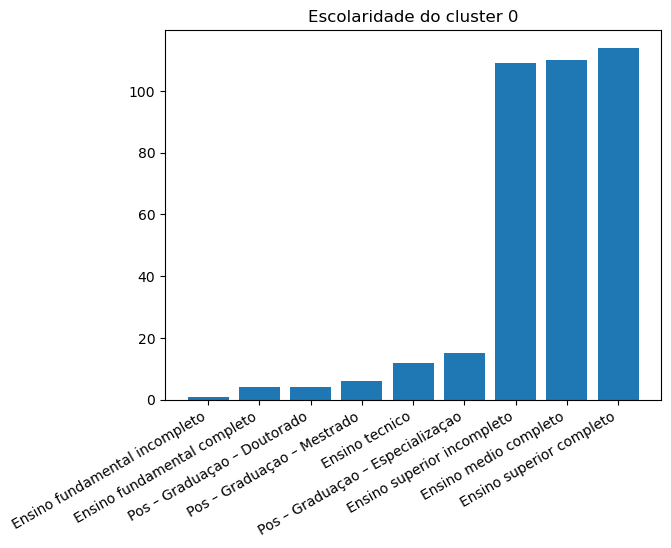

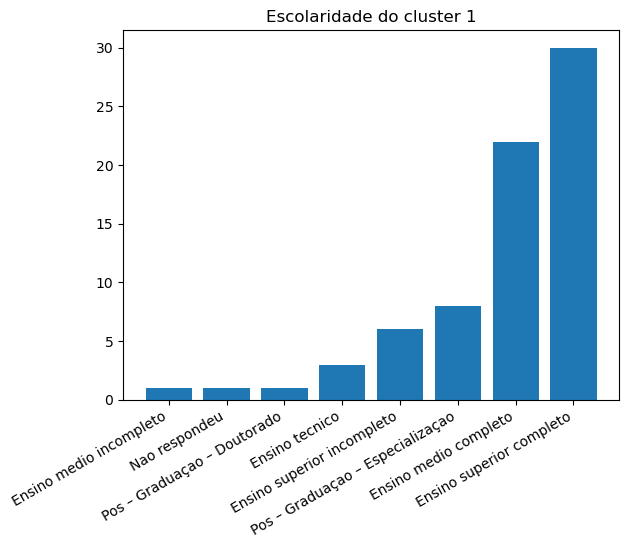

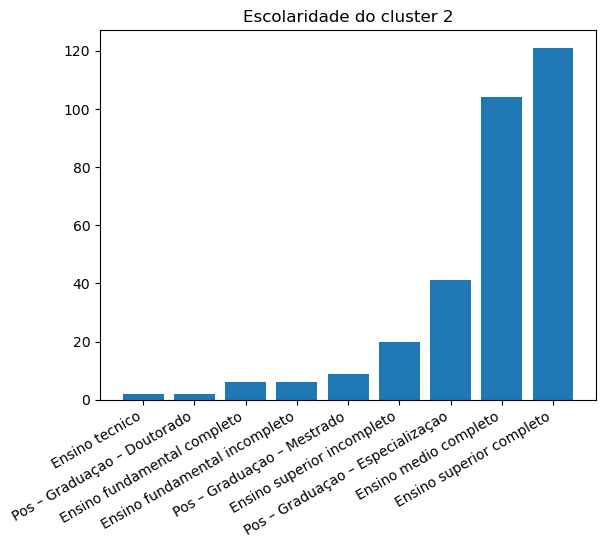

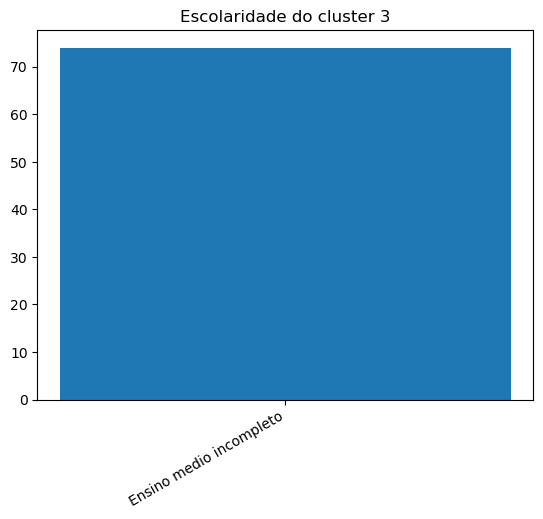

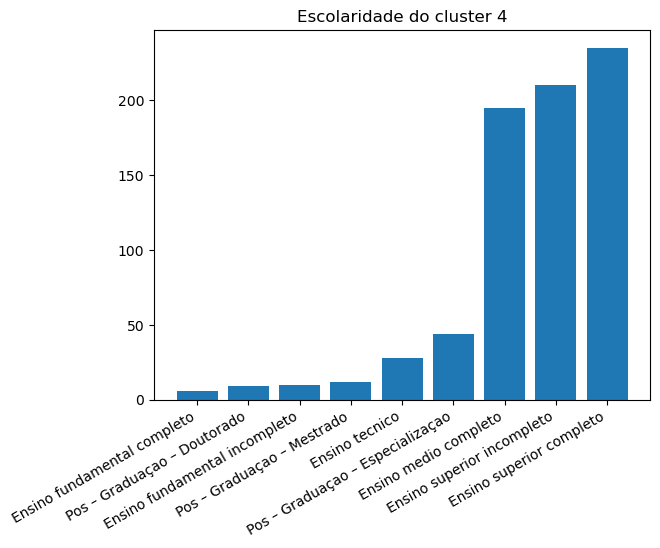

In [46]:
clusters = [0, 1, 2, 3, 4]

for cluster in clusters:
    c_esc = df[df['cluster']==cluster].groupby(['escolaridade'], as_index=False).agg({'idade':'count'}).sort_values(by='idade')
    plt.bar(c_esc['escolaridade'], c_esc['idade'])
    plt.xticks(rotation=30, ha='right')
    plt.title('Escolaridade do cluster {}'.format(cluster))
    plt.show()

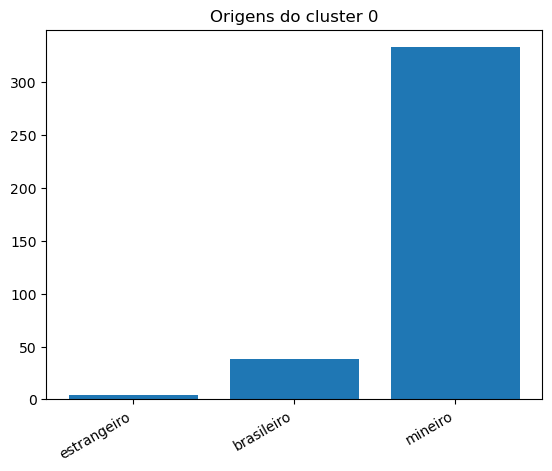

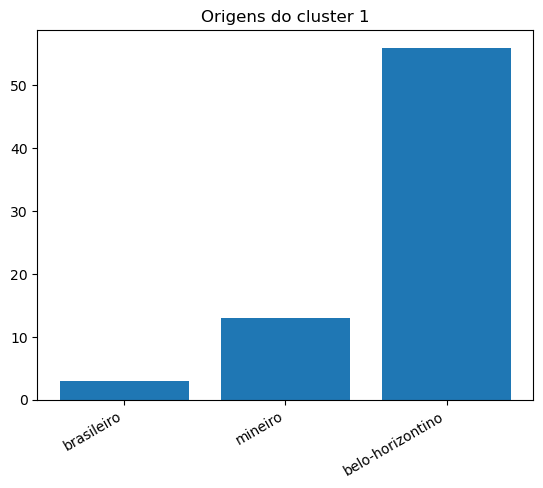

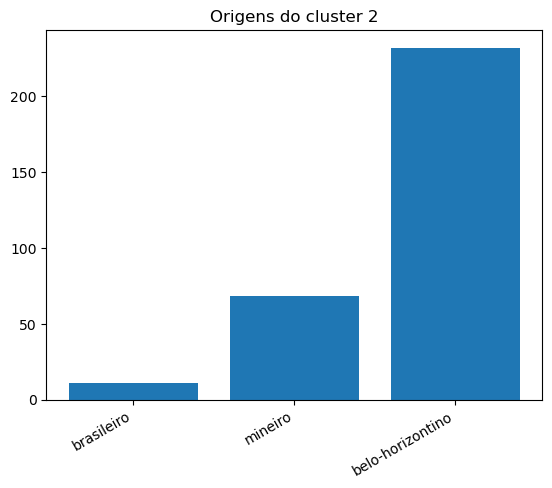

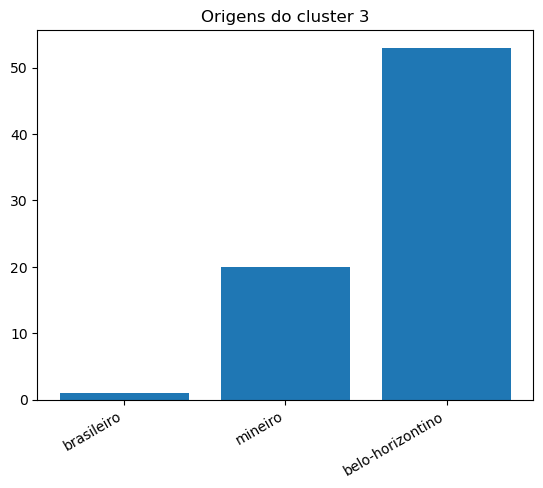

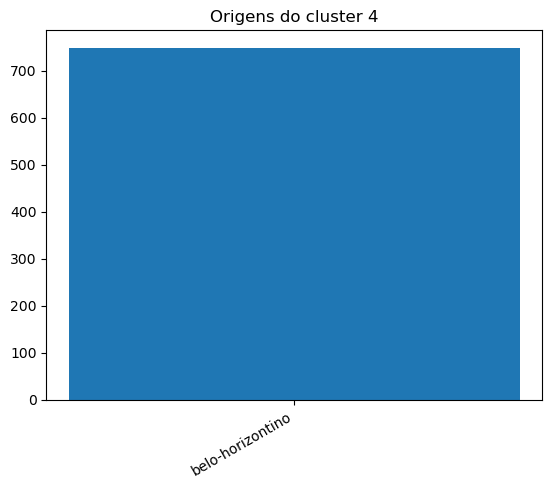

In [47]:
for cluster in clusters:
    c_esc = df[df['cluster']==cluster].groupby(['origem'], as_index=False).agg({'idade':'count'}).sort_values(by='idade')
    plt.bar(c_esc['origem'], c_esc['idade'])
    plt.xticks(rotation=30, ha='right')
    plt.title('Origens do cluster {}'.format(cluster))
    plt.show()

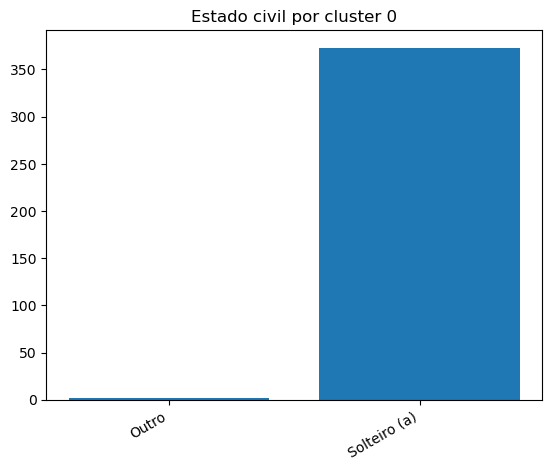

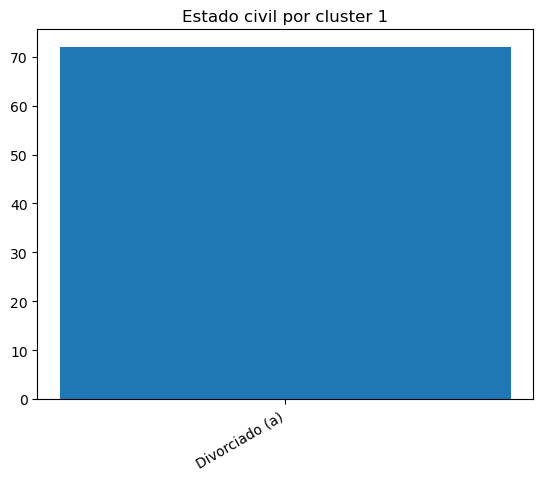

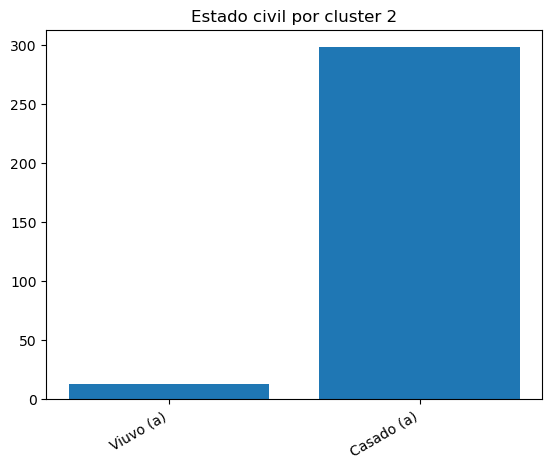

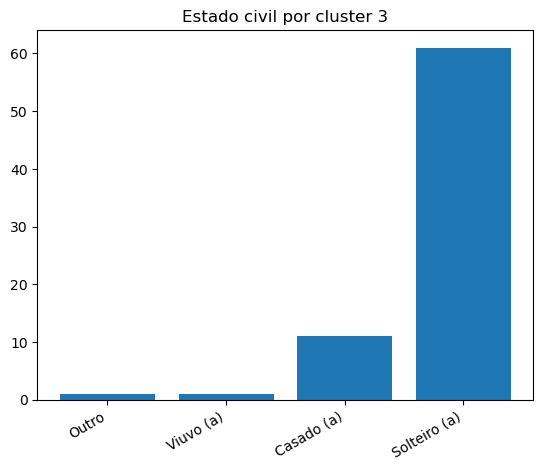

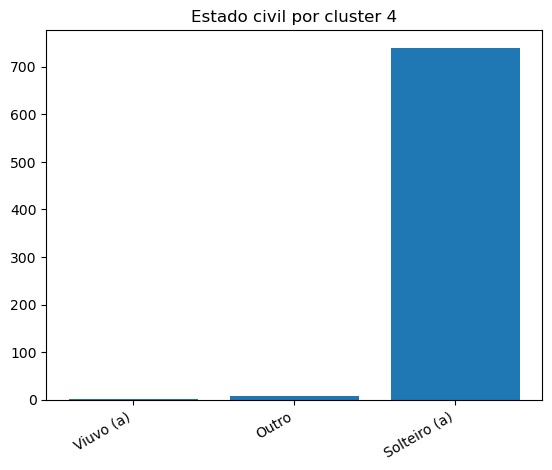

In [48]:
for cluster in clusters:
    c_esc = df[df['cluster']==cluster].groupby(['estado_civil'], as_index=False).agg({'idade':'count'}).sort_values(by='idade')
    plt.bar(c_esc['estado_civil'], c_esc['idade'])
    plt.xticks(rotation=30, ha='right')
    plt.title('Estado civil por cluster {}'.format(cluster))
    plt.show()

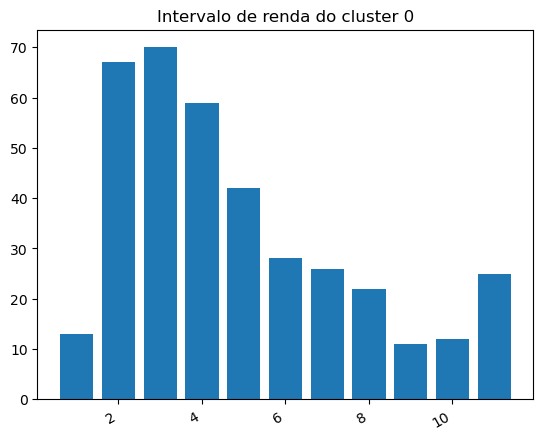

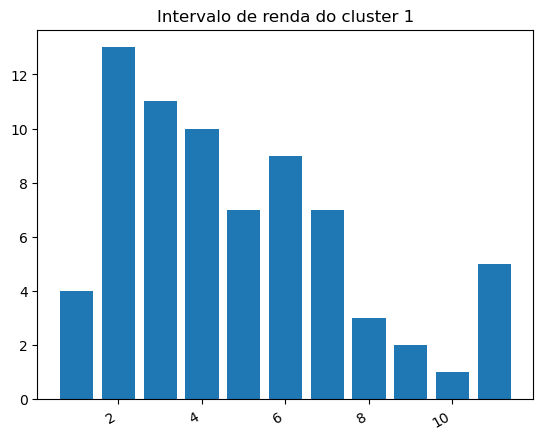

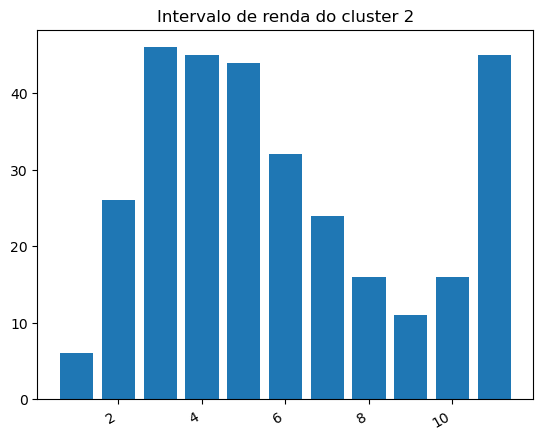

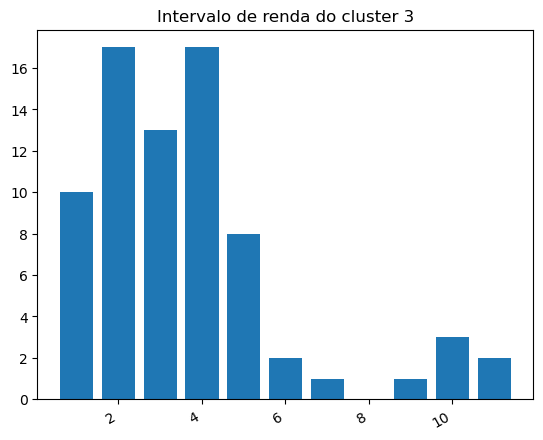

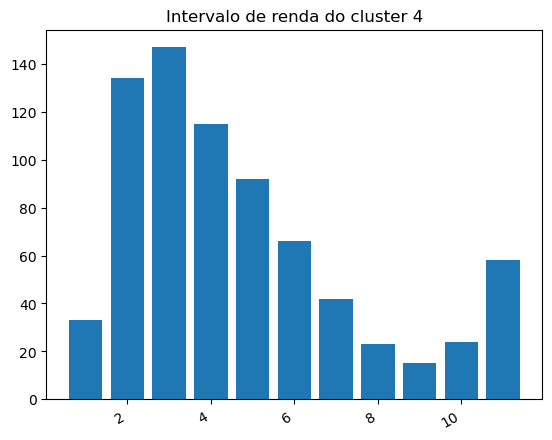

In [49]:
for cluster in clusters:
    c_esc = df[df['cluster']==cluster].groupby(['int_renda'], as_index=False).agg({'idade':'count'}).sort_values(by='idade')
    plt.bar(c_esc['int_renda'], c_esc['idade'])
    plt.xticks(rotation=30, ha='right')
    plt.title('Intervalo de renda do cluster {}'.format(cluster))
    plt.show()

In [52]:
df.groupby(['cluster', 'participou_anos_anteriores']).agg({'idade':'count'})

idade
cluster participou_anos_anteriores       
0       Nao                           143
        Sim                           232
1       Nao                            14
        Sim                            58
2       Nao                           105
        Sim                           206
3       Nao                            20
        Sim                            54
4       Nao                           134
        Sim                           615

## Análise dos perfis

Com base nas características de cada cluster, podemos concluir sobre os 5 perfis de foliões de BH:

* **Cluster 0 (Perfil 1)**: Idade mediana de 24 anos, ensino médio completo ou superior completo/cursando e solteiro. O grupo dos *jovens adultos*, universitários ou recém-formados.

* **Cluster 1 (Perfil 2)**: Idade mediana de 41,5 anos, ensino médio ou superior completo, totalmente divorciado. O grupo das *quarentonas divorciadas*, bem-estabelecidas e maduras.

* **Cluster 2 (Perfil 3)**: Idade mediana de 40 anos, ensino médio ou superior completo, maioria casados. O grupo dos *pais de família*, que provavelmente caem na folia com a esposa e/ou filhos. Têm maior renda.

* **Cluster 3 (Perfil 4)**: Idade mediana de 19 anos, totalmente ensino médio incompleto, maioria solteiro. O grupo dos *adolescentes*, com menor renda.

* **Cluster 4 (Perfil 5)**: Idade mediana de 26 anos, ensino médio completo ou superior completo/cursando, totalmente belo-horizontino e quase unanimamente solteiro. Maioria já participou em anos anteriores. O grupo dos *belo-horizontinos raiz*.